
# Random Walk in Two Dimensions

In two-dimensional random walk, the random walkers can move in a 2D grid such as the square lattice. Suppose the walkers start at the center of the grid at position $(x,y) = (0,0)$, the walkers can move at random with equal probability in one of the four directions - north $(x, y) = (0,1)$, south $(x, y) = (0,-1)$, east $(x, y) = (1,0)$, west $(x, y) = (-1,0)$. 

We would like to obtain the following observables:

- The mean-squared displacement of the walkers after $N$ steps.
- The mean number of distinct sites visited during the course of $N$ step walk.

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/random_walk_2d.py'

## 1. Trajectories of Walkers

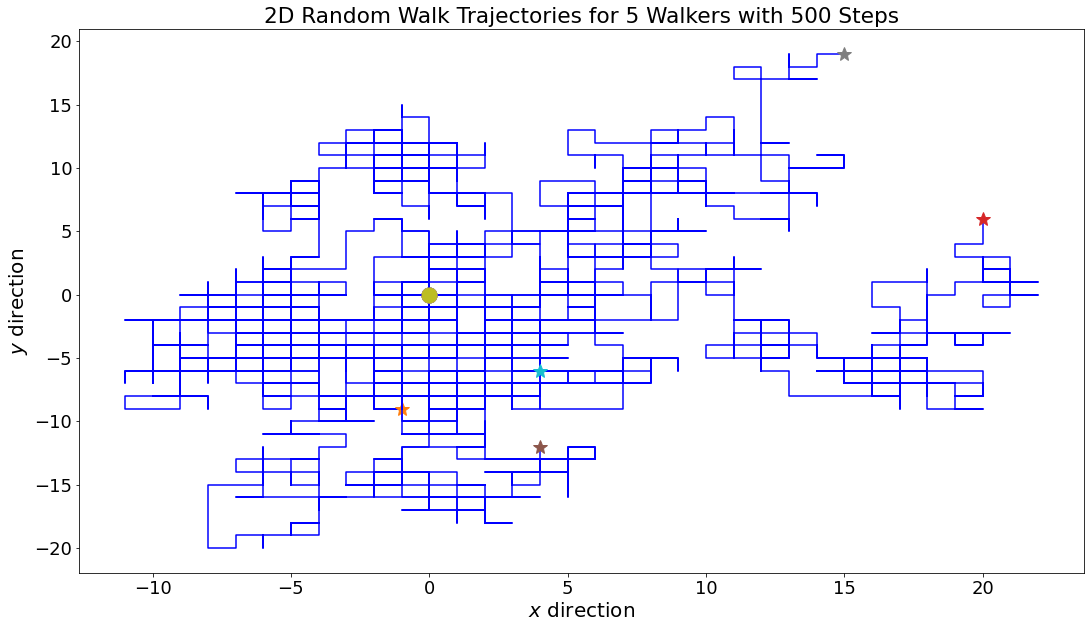

In [32]:
# instantiate class
nwalkers = 5
nsteps = 500

walk = RandomWalk2D(nsteps = nsteps, nwalkers = nwalkers)
x_arr, y_arr, sigma2x, sigma2y, r2 = walk.monte_carlo()

plt.subplots(figsize=(18, 10))
for i in range(len(x_arr)):
    plt.plot(x_arr[i,:],y_arr[i,:], color = 'b')
    plt.plot([0], [0], marker = 'o', markersize = 15)
    plt.plot([x_arr[i,-1]], [y_arr[i,-1]], marker = '*', markersize = 15)
    
plt.xlabel(r'$x$ direction', fontsize = 20)
plt.ylabel(r'$y$ direction', fontsize = 20)
plt.title("2D Random Walk Trajectories for {} Walkers with {} Steps".format(nwalkers,nsteps))
plt.savefig('../img/fig1.png')
plt.savefig('../img/fig1.pdf')
plt.show()

## 2A. Mean-Squared Displacement

In [3]:
walk = RandomWalk2D(nsteps = 1000, nwalkers = 10000)
x_arr, y_arr, sigma2x, sigma2y, r2 = walk.monte_carlo()

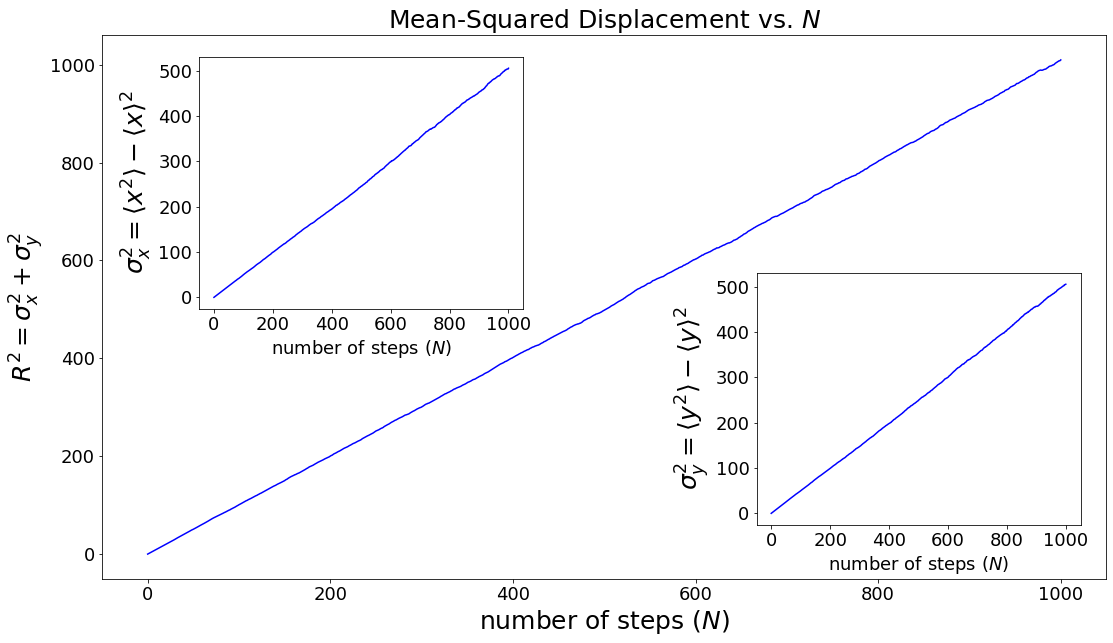

In [14]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.5,0.25,0.35]
left_, bottom_, width_, height_ = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])
ax3 = fig.add_axes([left_, bottom_, width_, height_])

# plot
ax1.plot(range(len(r2)), r2, color = 'b')
# ax1.plot(range(len(r2)), range(len(r2)), color = 'g')
ax2.plot(range(len(sigma2x)), sigma2x, color = 'b')
ax3.plot(range(len(sigma2y)), sigma2y, color = 'b')

ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$R^2 = \sigma_x^2 + \sigma_y^2$', fontsize = 25)
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\sigma_x^2 = \langle x^2 \rangle - \langle x \rangle^2$', fontsize = 25)
ax3.set_xlabel(r'number of steps ($N$)')
ax3.set_ylabel(r'$\sigma_y^2 = \langle y^2 \rangle - \langle y \rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement vs. $N$', fontsize = 25)
plt.savefig('../img/fig2a.png')
plt.savefig('../img/fig2a.pdf')
plt.show()

## 2B. Power-Law and Critical Exponent

In [4]:
# extract few values for log-log plot
walk = RandomWalk2D(nsteps = 1000, nwalkers = 10000)
_, _, _, _, r2 = walk.monte_carlo()

n = [8, 16, 32, 64]
r2_ = np.zeros(len(n))
for i, val in enumerate(n):
    r2_[i] = r2[val]

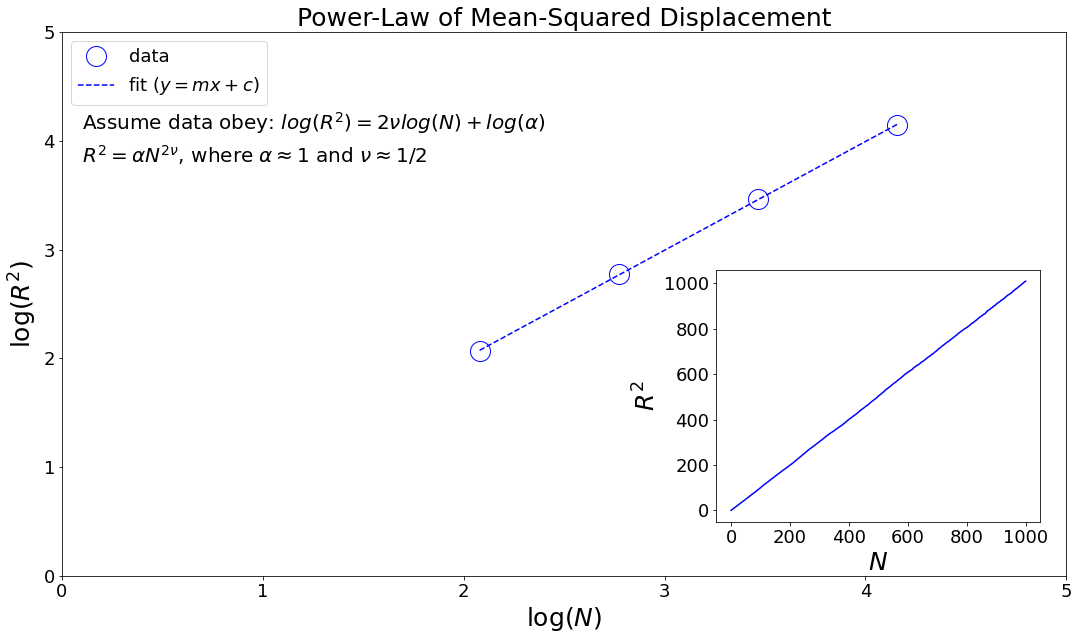

alpha = 0.99 and nu = 0.5


In [5]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(n), np.log(r2_), color = 'b', marker = 'o', markerfacecolor = 'none',
         linestyle = " ", markersize = 20, label = 'data')
ax2.plot(range(len(r2)), r2, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(r2_), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,5])
ax1.set_ylim([0,5])
ax1.set_ylabel(r'log($R^2$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of Mean-Squared Displacement', fontsize = 25)
ax1.text(0.1,4.1, r'Assume data obey: $log(R^2) = 2\nu log(N) + log(\alpha)$', fontsize = 20)
ax1.text(0.1, 3.8, r'$R^2 = \alpha N^{2\nu}$, where $\alpha \approx 1$ and $\nu \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_ylabel(r'$R^2$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/fig2b.png')
plt.savefig('../img/fig2b.pdf')
plt.show()

#------------------------------------------------------------#
alpha = np.exp(c)
nu = m/2
print("alpha = {0:.2g} and nu = {1:.2g}".format(alpha, nu))

## 3. Mean Number of Distinct Sites Visited

In [16]:
walk = RandomWalk2D(nsteps = 1000, nwalkers = 10000)
res = walk.average_sites_visited()

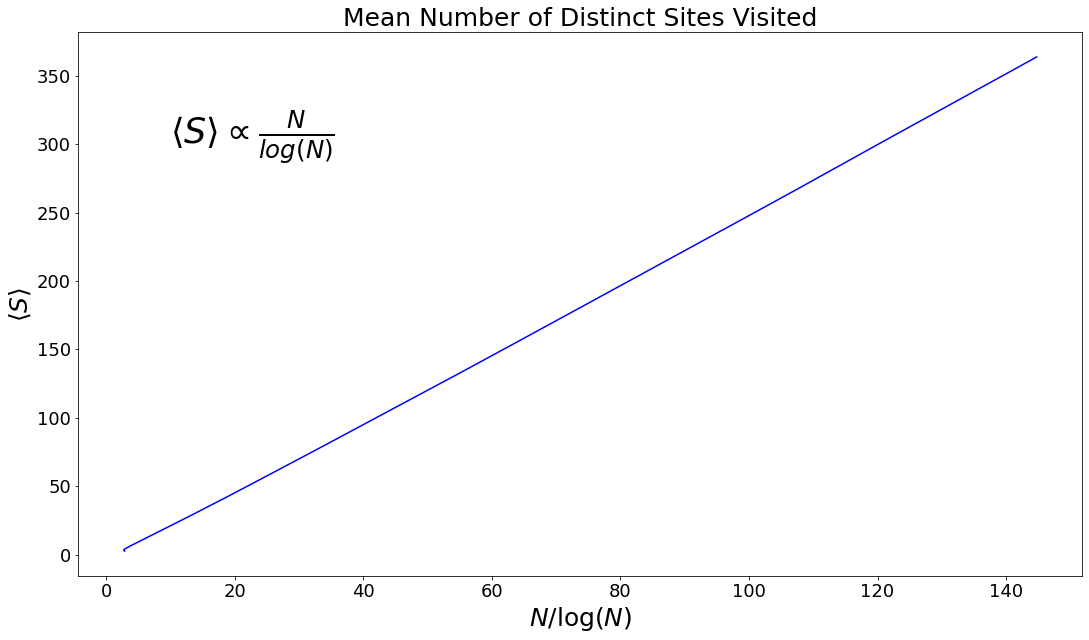

In [17]:
plt.subplots(figsize=(18, 10))
plt.plot(range(1,len(res))/np.log(range(1,len(res))), res[1:], color = 'b')

plt.xlabel(r'$N$/log($N$)', fontsize = 25)
plt.ylabel(r'$\langle S\rangle$', fontsize = 25)
plt.text(10, 300, r'$\langle S\rangle \propto \frac{N}{log(N)}$', fontsize = 35)
plt.title(r'Mean Number of Distinct Sites Visited', fontsize = 25)
plt.savefig('../img/fig3.png')
plt.savefig('../img/fig3.pdf')